## Combining Datasets

In this script we will combine the data gathered from the depreessive scrapping script with the data from the mostly non-depressive scripts,
analyse their target distribution, standardise their formats and then construct a final dataset containing all of them.

The data from the depressive script hsa been manually reviewed and annotated by several different team members, and then reviewwd one more
time by aonther member, to ensure consistency.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**1. Read in non-depressive dataset**

In [2]:
df0 = pd.read_csv("./data/general_tweets.csv")

In [3]:
df1 = pd.read_csv("./data/tweets_final_1_clean.csv", engine='python')
df2 = pd.read_csv("./data/tweets_final_2_clean.csv", engine='python')
df3 = pd.read_csv("./data/tweets_final_3_clean.csv", engine='python')

In [4]:
df4 = pd.read_csv("./data/tweets_final_4_clean.csv", engine='python')
df5 = pd.read_csv("./data/tweets_final_5_clean.csv", engine='python')
df6 = pd.read_csv("./data/tweets_final_6_clean.csv", engine='python')

In [5]:
pd.set_option('display.max_colwidth', -1)

**2. Briefly analyse their content**

In [43]:
df0.head(2)

,tweet,target
0,Be happy. Be confident. Be kind.\n\n #KissablesLoveSMShopmag\nAllOutDenimFor KISSMARC,0
1,@queenjlouise @mamaw_gereck awe thanks 😊,0


In [44]:
df0.head(2)

,tweet,target
0,Be happy. Be confident. Be kind.\n\n #KissablesLoveSMShopmag\nAllOutDenimFor KISSMARC,0
1,@queenjlouise @mamaw_gereck awe thanks 😊,0


In [45]:
df1.head(2)

,tweet,target
0,"mood can be caused by infectious diseases, nutritional deficiencies, neurological conditions, and physiological problems.",0
1,"With all of this unnessary family drama, I feel like moving far away and starting over again. From one thing to another I just feel . Hope I get through this",1


In [46]:
df2.head(2)

,tweet,target
0,"Looking for some beautiful images. Having a really crappy week, and need some support. . Post some great beauty. Thank you.",1
1,"When teens feel down, there are ways they can cope with these feelings to avoid serious , such as make new friends or social connections and participate in sports or school activities. Call Focus & Balance at 210-858-9980 to learn more and see how we can help. pic.twitter.com/ydrYcTBD2r",0


In [47]:
df3.head(2)

,tweet,target
0,Why is tomorrow Monday??? & LOL,0
1,I feel like I'm annoying like Always…,1


In [48]:
df4.head(2)

,tweet,target
0,2016 was the best year so far,0
1,So over new years think I'm just going to sleep into the new year.,0


In [49]:
df5.head(2)

,tweet,target
0,"On topic of famous people , apparently stuff needs to be put in place for mental illness. What about non famous people",0
1,Tripped hard today! This is promising!,1


In [50]:
df3.head(2)

,tweet,target
0,Why is tomorrow Monday??? & LOL,0
1,I feel like I'm annoying like Always…,1


[Text(0.5, 1.0, 'target distribution - df6')]

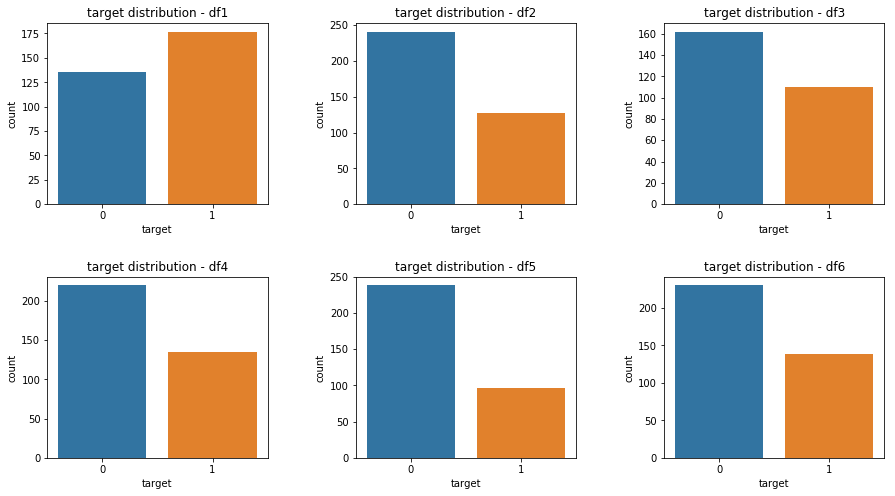

In [17]:
fig = plt.figure(figsize=(15,8))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax1 = fig.add_subplot(2,3,1)
sns.countplot(x='target', data=df1)
ax1.set(title="target distribution - df1")

ax2 = fig.add_subplot(2,3,2)
sns.countplot(x='target', data=df2)
ax2.set(title="target distribution - df2")

ax3 = fig.add_subplot(2,3,3)
sns.countplot(x='target', data=df3)
ax3.set(title="target distribution - df3")

ax4 = fig.add_subplot(2,3,4)
sns.countplot(x='target', data=df4)
ax4.set(title="target distribution - df4")

ax5 = fig.add_subplot(2,3,5)
sns.countplot(x='target', data=df5)
ax5.set(title="target distribution - df5")

ax6 = fig.add_subplot(2,3,6)
sns.countplot(x='target', data=df6)
ax6.set(title="target distribution - df6")

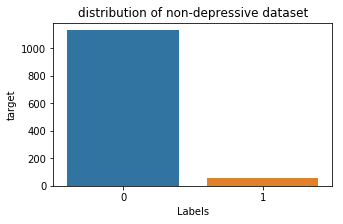

In [18]:
fig = plt.figure(figsize=(5,3))
plt.title('distribution of non-depressive dataset')
ax = sns.barplot(x=df0.target.unique(),y=df0.target.value_counts());
ax.set(xlabel='Labels');

**3. Standardise dataset format**

In [20]:
df0 = df0[['Tweet','target']].copy()

df1 = df1[['tweet_processed','target']].copy()
df2 = df2[['tweet_processed','target']].copy()
df3 = df3[['tweet_processed','target']].copy()
df4 = df4[['tweet_processed','target']].copy()
df5 = df5[['tweet_processed','target']].copy()
df6 = df6[['tweet_processed','target']].copy()

In [22]:
df0 = df0.rename(columns = {"Tweet": "tweet"}) 

df1 = df1.rename(columns = {"tweet_processed": "tweet"}) 
df2 = df2.rename(columns = {"tweet_processed": "tweet"}) 
df3 = df3.rename(columns = {"tweet_processed": "tweet"}) 
df4 = df4.rename(columns = {"tweet_processed": "tweet"}) 
df5 = df5.rename(columns = {"tweet_processed": "tweet"}) 
df6 = df6.rename(columns = {"tweet_processed": "tweet"}) 

let´s skep df1 and df2 for the time being, as the labels are a little inconsistent

In [29]:
df_all = pd.concat([df0, df1, df2, df3, df4, df5, df6])

In [56]:
df_all = df_all.sample(frac=1).reset_index(drop=True)
df_all.head(10)

,tweet,target
0,Today in Selfcare: beauty &amp; laughs Kung Fu Panda 3 #Wellness #joy #laughter #selfcare #therapist #philadelphia,0
1,I get to spend New Year's home again alone and lonely. ???•,1
2,"Depressed and lonely /: Stuck in a deep, never ending hole :(",1
3,"If this is your response to someone saying they're dealing with , you're a terrible person.",0
4,Apparently you get a free pass just by mentioning Where was I on the free badge day??!!,0
5,When you will never again give birth to violent men.. pic.twitter.com/pkdPhhlUuZ,0
6,Learning to pretend to have a good time had become a natural skill. I hope one day it is genuine,1
7,Aw man im outta pizza rolls,0
8,When you go out and try to be a part of life & end up feeling like you are less a part of it then when you started. pic.twitter.com/J625NXrWDb,0
9,So far he stop texting me…after I said something…so hopefully he doesn't show up at my house…,1


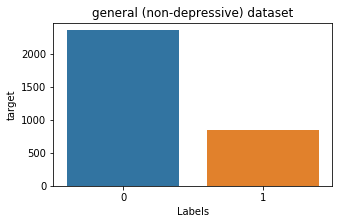

In [31]:
fig = plt.figure(figsize=(5,3))
plt.title('general (non-depressive) dataset')
ax = sns.barplot(x=df_all.target.unique(),y=df_all.target.value_counts());
ax.set(xlabel='Labels');

In [57]:
df_all.target.value_counts()

0    2357
1    843 
Name: target, dtype: int64

In [58]:
df_all.to_csv("./data/tweets_combined.csv")

## Conclusion:
Even though the target is not balanced as there are more non-depressive data, we believe it covers a good range of depressive and non-depressive tweets and would be a good basis for developing a depression detection classifier